In [1]:
from pyiron_workflow import Workflow

In [2]:
@Workflow.wrap.as_function_node()
def add_x_and_y(x, y):
    z = x + y
    return z

In [3]:
@Workflow.wrap.as_function_node()
def add_x_and_y_and_z(x, y, z):
    w = x + y + z
    return w

In [4]:
wf = Workflow("my_workflow")

In [5]:
wf.x = 1
wf.y = 2
wf.z = add_x_and_y(x=wf.x, y=wf.y)
wf.w = add_x_and_y_and_z(x=wf.x, y=wf.y, z=wf.z)

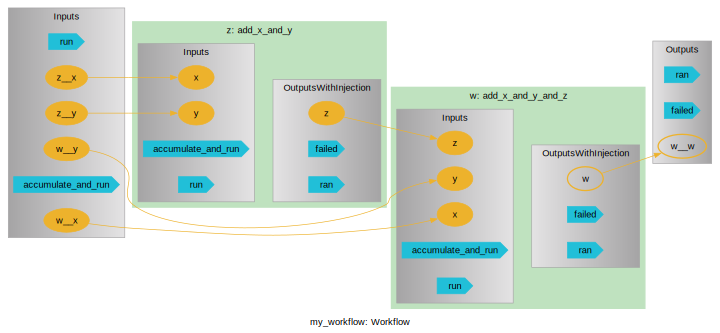

In [6]:
wf.draw(size=(10,10))

In [7]:
wf.run()

{'w__w': 6}

In [8]:
wf.graph_as_dict

{'nodes': {'/my_workflow/z': <__main__.add_x_and_y at 0x7f46b2baf7d0>,
  '/my_workflow/w': <__main__.add_x_and_y_and_z at 0x7f46a79153a0>},
 'edges': {'data': {('/my_workflow/z.z',
    '/my_workflow/w.z'): (<pyiron_workflow.mixin.injection.OutputDataWithInjection at 0x7f46a7a48260>, <pyiron_workflow.channels.InputData at 0x7f46a781d940>)},
  'signal': {('/my_workflow/z.ran',
    '/my_workflow/w.accumulate_and_run'): (<pyiron_workflow.channels.OutputSignal at 0x7f46a781d8b0>, <pyiron_workflow.channels.AccumulatingInputSignal at 0x7f4931ae7170>)}}}

In [9]:
funct = wf.graph_as_dict["nodes"]["/my_workflow/z"].node_function

In [10]:
funct(x=1, y=3)

4